# Análise dos Dados do Enem 2021

## Avalição da Nota de Ciências Humanas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

pd.set_option('display.max_columns', None)

### Base de Dados

In [2]:
%time Enem_21 = pd.read_csv('./MICRODADOS_ENEM_2021.csv', encoding='ISO-8859-1', sep=';')
Enem_21.head()

CPU times: total: 47.7 s
Wall time: 57.8 s


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


#### Dados filtrados por presença e removido a nota 0

In [3]:
base_Enm_21_Fitro = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_CH'] == 1) & 
                                 (Enem_21.loc[:,'NU_NOTA_CH'] != 0)]

In [4]:
base_Enm_21_Fitro.shape

(2373747, 76)

In [3]:
Ausencia = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_CH'] == 0)]
Ausencia.shape

(1007397, 76)

### Bibliotéca de Funções

<hr>

In [10]:
# Esta função gera um describe da nota, pelas classes da coluna desejada.

def Estat_Desc (clmn_1, clmn_2):
    
    Estat_Desc = pd.DataFrame()
    total = base[base[clmn_1].notnull()][coluna_1].count()
    count_percent = []
    
    
    for k, v in Dicionario_Labels.items():
        Estat_Desc[k] = base.loc[base.loc[:,clmn_1] == v, clmn_2].describe().round(2)
        percentagem = (base.loc[base.loc[:,clmn_1] == v,clmn_2].count() / total)*100
        count_percent.append(percentagem.round(2))
    
    Estat_Desc = Estat_Desc.T
    Estat_Desc.insert(loc = 1, column = 'count_%', value = count_percent)
    Estat_Desc = Estat_Desc.T
    
    print()
    print(titulo)
    return Estat_Desc

In [6]:
# Esta função gera um gráfico Boxplot da nota, pelas classes da coluna desejada.

def Box_Plot (clmn_1, clmn_2):
    
    lst_k = []
    lst_v = []
    
    for k, v in Dicionario_Labels.items():
        lst_k.append(k)
        lst_v.append(v)
        
    plt.figure(figsize=(15,5))
    sbn.boxplot(x=clmn_1, y=clmn_2, showmeans=True, data=base, showfliers=Outliers, order=lst_v)
    plt.title(titulo, fontsize=15)
    plt.xlabel(clmn_1, fontsize=12)
    plt.ylabel(clmn_2, fontsize=12)
    ticks, labels = plt.xticks()
    plt.xticks(ticks, labels=lst_k)
    plt.show

In [7]:
# Esta função gera gráficos de Histograma da nota, pelas classes da coluna desejada.

def Hist_Plot (clmn_1, clmn_2):
        
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    qtd_lnh = 2 if qtd_lnh == 1 else qtd_lnh
    fig, ax = plt.subplots(qtd_lnh, 2, figsize=(12,8), constrained_layout=True)
   
           
    count_k = -1
    lnh_pos = -1
        
    for k, v in Dicionario_Labels.items():
        count_k += 1
                       
        if count_k%2 == 0:
            lnh_pos += 1                       
            ax[lnh_pos,0].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,0].set_title(k)
            ax[lnh_pos,0].set_xlabel(clmn_2, fontsize=7)
            
            
        else:
            ax[lnh_pos,1].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,1].set_title(k)
            ax[lnh_pos,1].set_xlabel(clmn_2, fontsize=7)
            
    plt.show()

In [ ]:
# Avaliação da variação da média por

titulo = ''
coluna_1 = ''                  # Clases
coluna_2 = ''                  # Notas
base = base_Enm_21_Fitro

vrl_k = []
vrl_v = sorted(base[coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
Dicionario_Labels = {}


display(Estat_Desc(coluna_1, coluna_2))

Outliers = True

Box_Plot(coluna_1, coluna_2)

Hist_Plot(coluna_1, coluna_2)

print('=======================================================================================================================')

<hr>

In [ ]:
base_Enm_21_Fitro.isnull().sum()

In [8]:
coluna_2 = 'NU_NOTA_CH'        # Notas de Ciência da Natureza
base = base_Enm_21_Fitro
nota = 'CH'


Avaliação da variação da Nota CH por Faixa Etária.


,<17,17,18,19,20,21,22,23,24,25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,>70
count,248697.00,539835.00,550931.00,275495.00,161165.00,106565.00,75232.00,54648.00,44409.00,35288.00,107435.00,60639.00,44388.00,29308.00,18970.00,11308.00,5995.00,2321.00,790.00,328.00
count_%,10.48,22.74,23.21,11.61,6.79,4.49,3.17,2.30,1.87,1.49,4.53,2.55,1.87,1.23,0.80,0.48,0.25,0.10,0.03,0.01
mean,515.72,520.05,516.31,518.14,521.65,525.27,527.51,529.00,529.33,530.06,533.35,536.81,530.52,522.20,522.95,527.09,531.86,529.44,513.98,505.37
std,84.91,88.33,90.70,95.11,98.11,99.94,100.44,100.48,99.65,99.80,100.11,99.57,98.15,95.89,95.98,97.57,97.69,99.54,96.63,89.20
min,320.60,314.70,315.80,312.80,311.60,314.10,311.80,314.00,311.60,316.50,312.60,311.60,311.90,312.60,311.60,311.60,312.00,317.70,328.90,328.90
25%,448.40,450.10,443.60,440.40,440.80,442.50,443.90,445.68,446.90,448.70,450.90,456.40,450.80,443.90,444.40,447.40,452.45,446.50,434.28,436.72
50%,520.30,522.90,516.30,516.60,520.20,524.50,527.70,530.50,531.80,532.30,537.30,542.10,534.00,524.60,525.70,530.30,534.70,535.70,512.80,498.30
75%,579.50,585.20,583.10,588.80,594.40,599.80,603.50,604.60,604.60,605.90,609.15,611.80,604.10,593.60,595.90,602.50,607.85,608.10,592.07,575.52
max,846.90,846.90,846.90,846.90,846.90,846.90,846.90,832.50,846.90,832.50,846.90,846.90,846.90,832.50,824.00,846.90,803.20,787.10,763.90,762.40


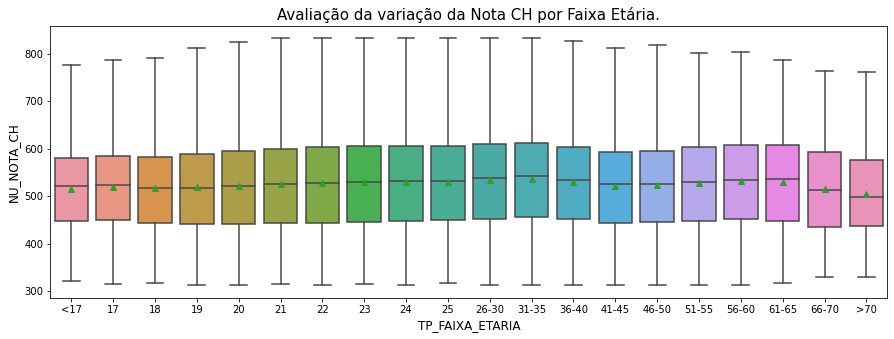

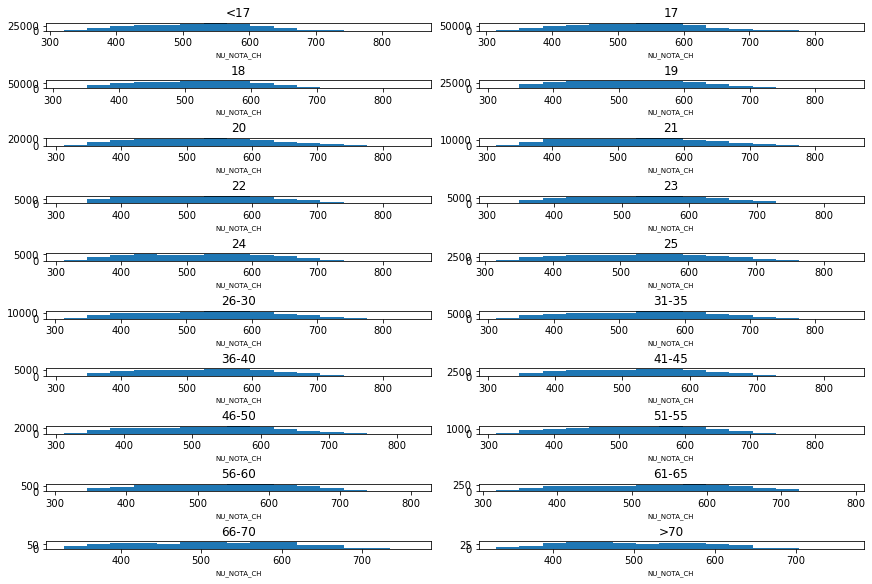




Avaliação da variação da Nota CH por sexo


,SEXO_FEMININO,SEXO_MASCULINO
count,1467789.00,905958.00
count_%,61.83,38.17
mean,514.19,531.92
std,90.02,96.85
min,311.60,311.60
25%,442.30,453.10
50%,513.30,537.80
75%,579.90,603.60
max,846.90,846.90


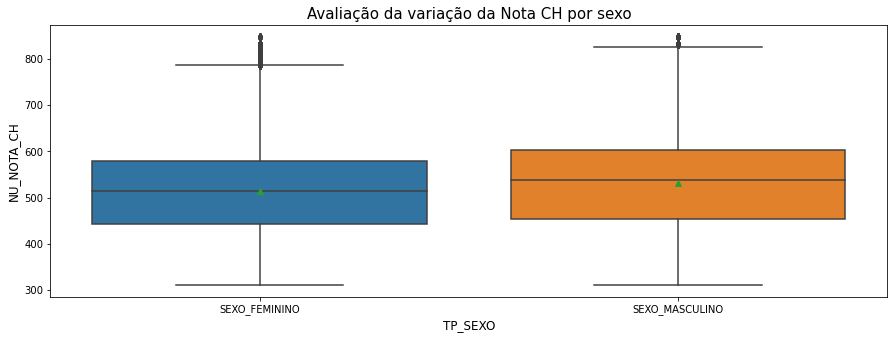

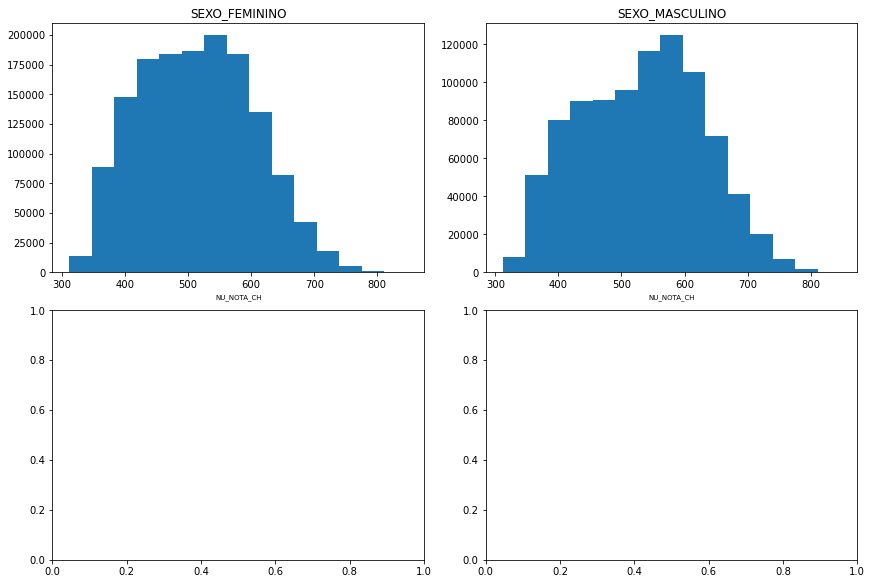




Avaliação da variação da Nota CH por Raça


,Nao declarado,Branca,Preta,Parda,Amarela,Indigena,Nao dispoe da informacao
count,46532.00,1031458.00,264166.00,972368.00,47659.00,11562.00,2.00
count_%,1.96,43.45,11.13,40.96,2.01,0.49,0.00
mean,524.00,542.66,502.80,503.58,515.49,471.72,530.55
std,99.78,93.32,87.59,89.08,93.14,78.91,48.72
min,313.40,311.60,311.60,311.60,315.80,313.60,496.10
25%,441.30,471.80,431.90,431.70,439.90,409.60,513.33
50%,522.30,549.60,499.90,499.20,513.50,460.70,530.55
75%,598.80,610.00,568.00,569.00,582.90,525.60,547.78
max,846.90,846.90,846.90,846.90,832.50,808.20,565.00


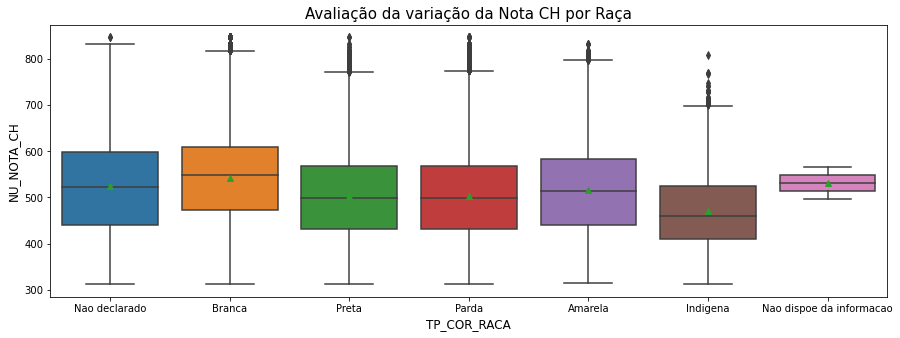

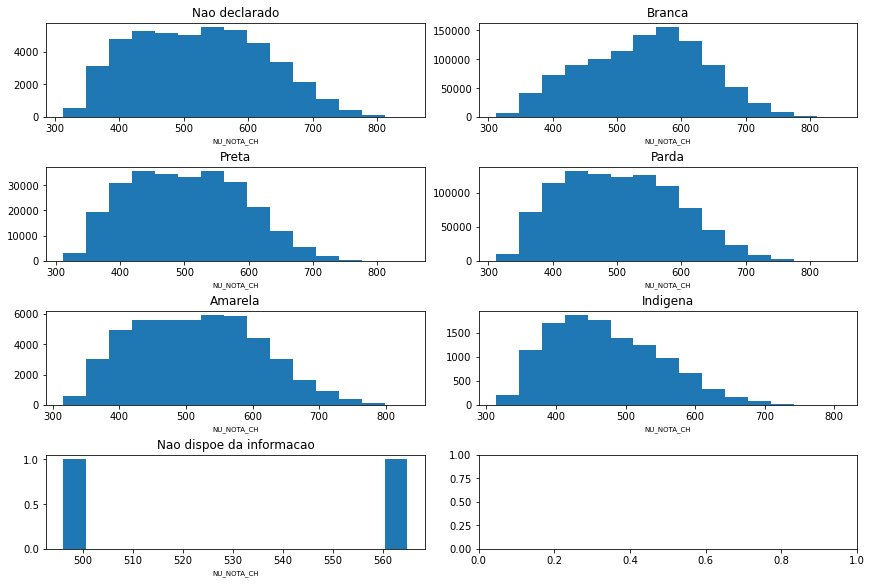




Avaliação da variação da Nota CH por Ano de Conclusão Ensino Médio.


,Nao informado,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,Antes 2007
count,1382995.00,290391.00,167082.00,105996.00,75262.00,53909.00,41628.00,33227.00,26421.00,22550.00,18201.00,16503.00,14765.00,12702.00,11804.00,100311.00
count_%,58.26,12.23,7.04,4.47,3.17,2.27,1.75,1.40,1.11,0.95,0.77,0.70,0.62,0.54,0.50,4.23
mean,510.25,527.80,529.80,533.02,538.21,542.99,540.88,542.41,544.73,545.51,548.55,543.45,547.32,548.55,545.18,550.38
std,88.06,93.49,97.21,99.41,100.42,100.58,100.01,99.27,99.19,99.75,99.48,100.43,99.70,99.52,99.08,98.20
min,311.60,312.90,311.90,311.60,315.00,314.30,311.60,314.00,311.60,313.40,311.60,314.00,319.20,312.90,312.00,312.00
25%,439.30,453.10,451.00,452.10,456.40,462.30,460.20,463.20,465.30,465.50,472.30,463.70,469.50,472.60,466.98,475.50
50%,510.10,531.30,531.80,535.50,542.00,549.50,546.40,548.90,551.50,553.10,557.00,549.70,555.20,556.40,554.30,559.70
75%,575.90,596.40,601.60,606.80,613.60,618.50,616.70,617.20,619.50,621.90,622.90,618.60,621.50,622.70,620.02,624.30
max,846.90,846.90,846.90,846.90,846.90,846.90,832.50,846.90,832.50,846.90,846.90,820.40,832.50,832.50,832.50,846.90


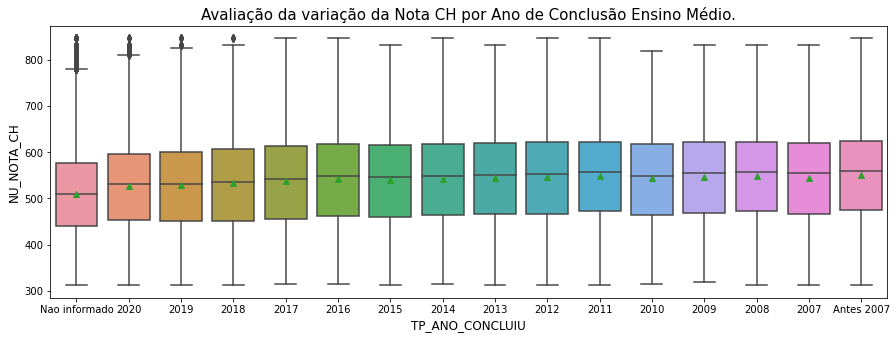

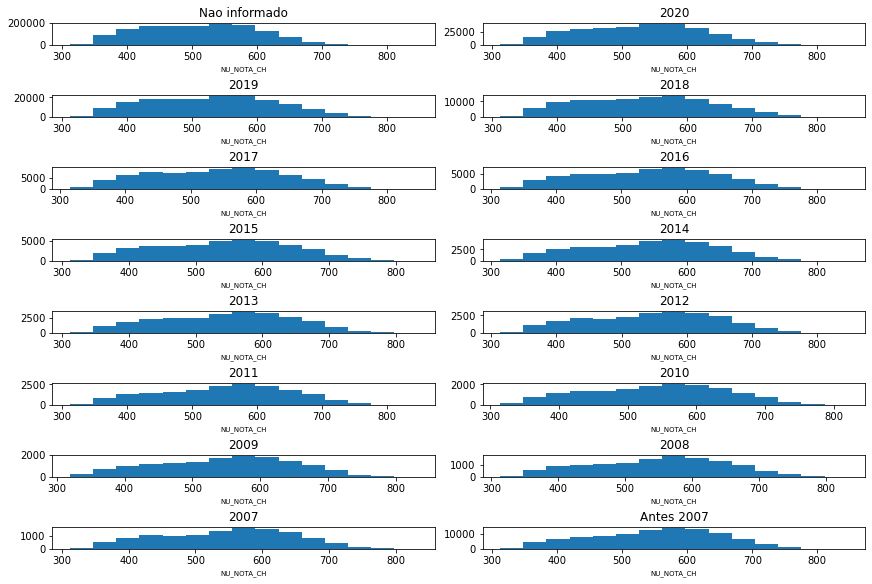




Avaliação da variação da Nota CH por Escola Pública/Privada.


,Nao Respondeu,Publica,Privada
count,1482830.00,708114.00,182803.00
count_%,62.47,29.83,7.70
mean,527.00,496.50,566.67
std,94.81,83.38,89.27
min,311.60,314.70,328.90
25%,450.70,429.70,508.60
50%,530.10,492.60,576.10
75%,596.80,558.80,629.50
max,846.90,846.90,846.90


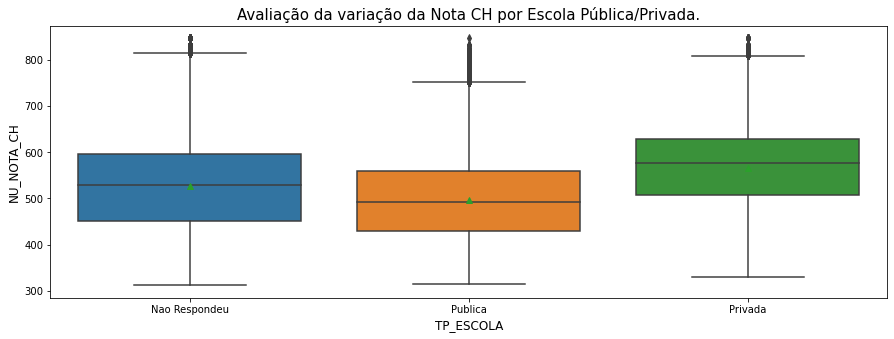

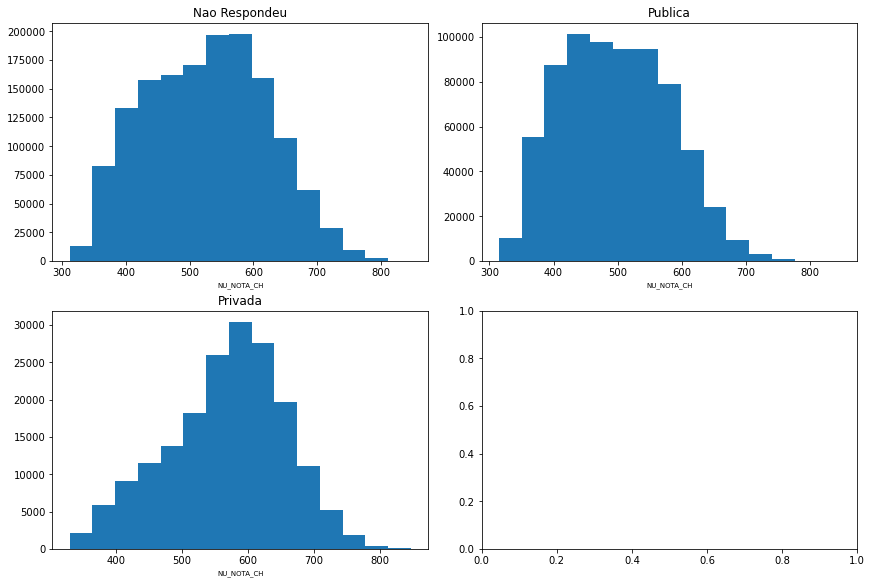




Avaliação da variação da Nota CH por região da aplicação da prova.


,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
count,13715.00,40740.00,49679.00,14126.00,184552.00,151125.00,47731.00,44942.00,89390.00,89814.00,231386.00,28910.00,37638.00,127198.00,73971.00,138180.00,58911.00,101989.00,168433.00,59202.00,20549.00,5256.00,107533.00,58191.00,39235.00,370207.00,21144.00
count_%,0.58,1.72,2.09,0.60,7.77,6.37,2.01,1.89,3.77,3.78,9.75,1.22,1.59,5.36,3.12,5.82,2.48,4.30,7.10,2.49,0.87,0.22,4.53,2.45,1.65,15.60,0.89
mean,499.40,502.49,483.36,496.43,507.04,505.17,540.59,530.64,514.98,490.09,539.70,512.86,510.56,496.09,505.29,506.74,497.22,534.31,536.31,518.44,497.92,507.59,536.93,538.00,505.59,546.13,494.80
std,84.57,90.69,84.41,88.25,91.99,93.47,97.29,91.10,91.44,88.16,94.03,90.49,89.09,87.51,92.82,91.03,90.80,89.81,92.61,93.57,85.90,87.49,90.45,88.12,93.88,89.65,88.29
min,327.60,313.40,311.60,311.60,312.60,313.80,311.90,322.40,312.90,312.50,315.80,320.50,317.20,311.60,317.20,311.60,311.90,320.10,315.50,314.30,320.60,326.10,311.60,322.80,311.80,311.90,319.40
25%,431.80,429.38,416.50,426.00,431.80,428.80,464.30,460.10,441.50,419.20,467.00,440.50,439.20,425.80,430.15,433.00,424.00,465.90,464.40,442.30,429.00,437.98,468.70,473.30,429.10,481.10,423.70
50%,495.10,496.30,472.40,490.10,503.00,498.40,545.80,535.90,513.60,479.40,545.70,510.80,509.90,489.00,499.00,502.30,487.70,540.50,542.70,517.90,493.50,505.00,543.00,544.80,499.10,552.70,486.10
75%,561.50,568.70,543.80,561.10,575.50,574.00,612.50,597.10,581.58,553.50,608.30,579.10,575.60,559.30,572.80,573.60,562.00,598.90,603.90,587.20,561.20,571.30,601.50,600.30,574.00,608.90,559.50
max,781.30,832.50,813.10,811.00,846.90,846.90,846.90,846.90,846.90,846.90,846.90,832.50,846.90,819.10,846.90,832.50,832.50,846.90,846.90,846.90,804.10,790.50,846.90,846.90,832.50,846.90,832.50


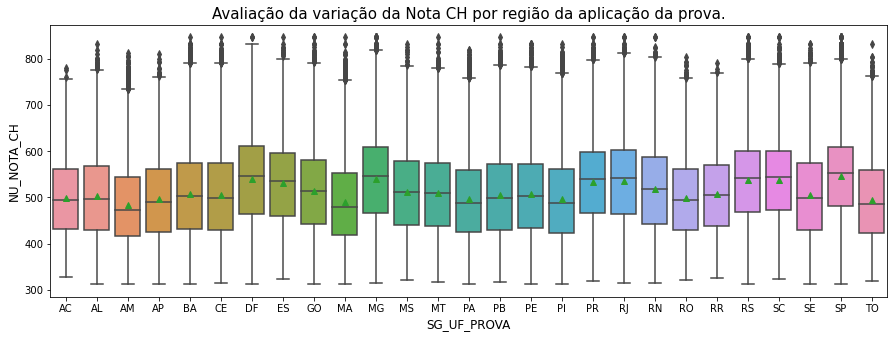

C:\Users\LHST\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


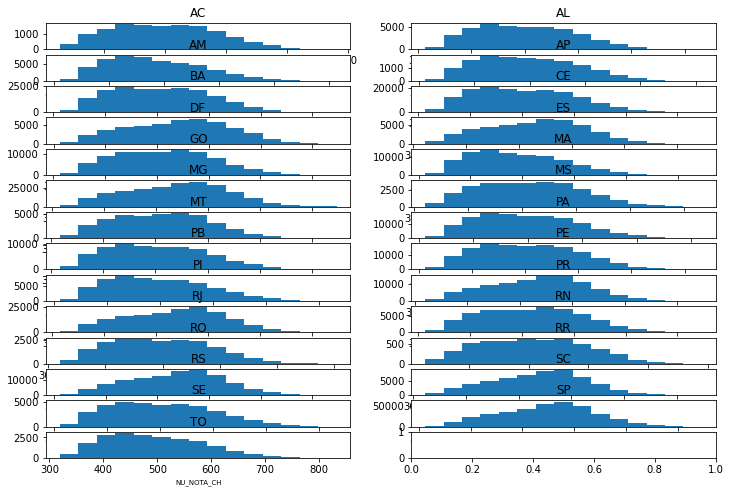




Avaliação da variação da Nota CH por Nível de Estudo do Responsável Homem.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,82495.00,376630.00,300450.00,261326.00,718479.00,256727.00,190781.00,186858.00
count_%,3.48,15.87,12.66,11.01,30.27,10.82,8.04,7.87
mean,479.66,493.58,504.68,510.82,526.78,564.22,572.37,500.41
std,81.91,85.35,87.56,88.56,90.93,93.33,94.38,87.31
min,311.60,311.60,311.60,311.60,311.60,317.20,328.90,312.50
25%,414.70,424.80,434.30,439.70,455.00,500.60,509.90,430.20
50%,469.80,487.60,501.90,510.30,531.10,573.60,582.60,495.80
75%,538.50,556.30,569.30,576.00,593.40,630.80,639.80,564.90
max,811.70,846.90,832.50,846.90,846.90,846.90,846.90,846.90


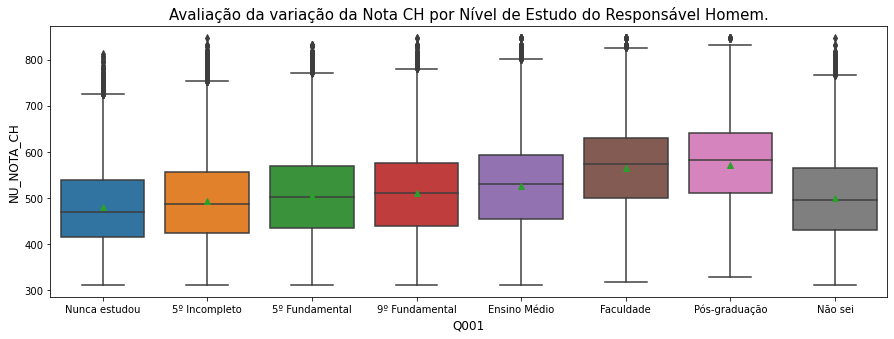

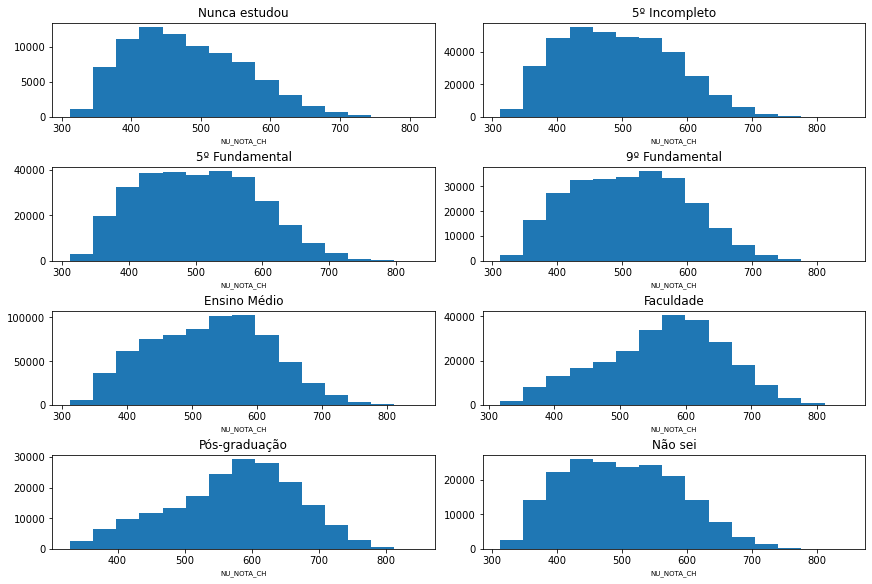




Avaliação da variação da Nota CH por Nível de Estudo do Responsável Mulher.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,52264.00,263226.00,242917.00,263159.00,841363.00,335532.00,322186.00,53099.00
count_%,2.20,11.09,10.23,11.09,35.44,14.14,13.57,2.24
mean,478.71,491.12,499.42,503.71,519.65,552.71,558.68,485.64
std,81.54,84.46,86.34,87.05,90.13,94.41,95.56,85.46
min,311.60,311.60,311.60,311.60,312.00,311.80,320.10,313.40
25%,414.00,423.20,430.30,434.00,447.60,483.20,490.00,417.90
50%,468.80,484.60,494.90,500.80,522.00,561.40,568.00,475.20
75%,537.80,553.10,562.90,567.80,585.90,621.10,627.80,546.70
max,811.70,846.90,832.30,832.50,846.90,846.90,846.90,846.90


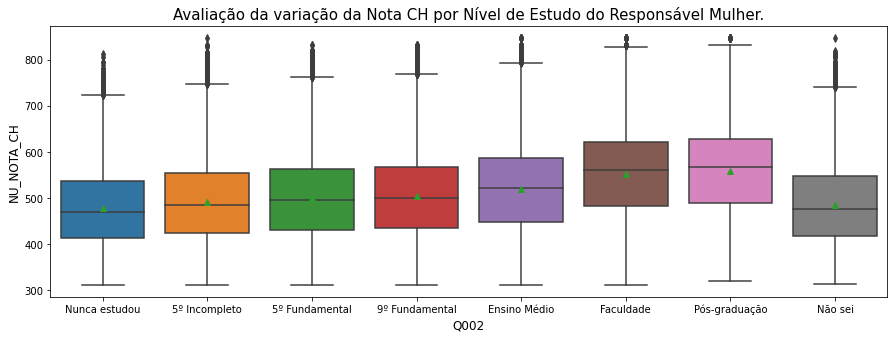

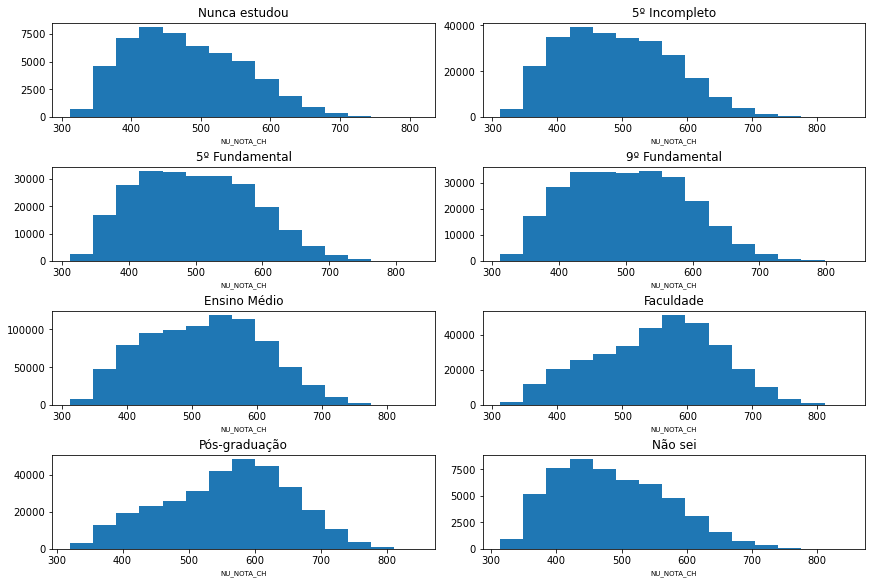




Avaliação da variação da Nota CH por Qtd de Residentes.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,52432.00,287837.00,648637.00,838792.00,362558.00,115240.00,39715.00,16109.00,5984.00,3512.00,1187.00,770.00,326.00,195.00,134.00,69.00,32.00,34.00,23.00,160.00
count_%,2.21,12.13,27.33,35.34,15.27,4.85,1.67,0.68,0.25,0.15,0.05,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01
mean,541.91,526.07,525.30,523.98,511.97,500.33,491.34,484.70,481.16,473.81,479.26,473.79,470.51,483.39,476.92,491.01,476.29,493.65,478.23,507.24
std,100.15,94.67,93.13,92.90,91.07,88.35,85.51,83.13,81.95,81.61,80.75,77.58,77.35,86.56,82.44,93.17,86.07,105.85,94.04,111.53
min,311.60,311.60,311.60,311.80,311.60,313.60,314.90,323.10,328.90,331.10,314.60,320.30,333.40,346.40,335.40,338.40,354.90,319.60,340.70,330.70
25%,461.30,449.80,450.70,449.40,438.30,429.50,423.60,418.70,414.90,410.10,414.55,411.40,409.72,415.80,417.25,415.90,410.48,417.78,417.15,414.50
50%,549.10,528.80,528.20,526.50,510.50,494.60,483.10,475.40,472.10,463.15,474.10,465.75,458.65,466.50,472.35,478.40,471.95,471.85,445.30,487.10
75%,617.20,596.00,593.70,592.20,578.80,565.00,552.40,544.10,540.20,530.55,535.60,525.30,524.50,544.15,528.92,556.60,539.67,551.02,539.25,604.53
max,846.90,846.90,846.90,846.90,846.90,846.90,846.90,814.60,814.60,772.10,809.20,754.00,755.10,710.90,729.20,738.90,675.80,694.70,713.00,732.60


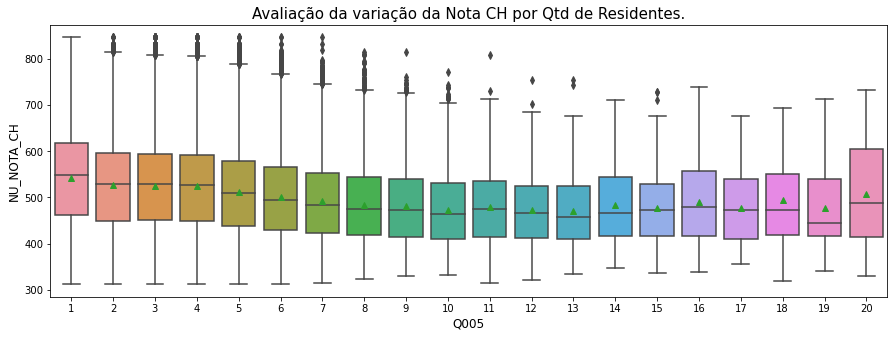

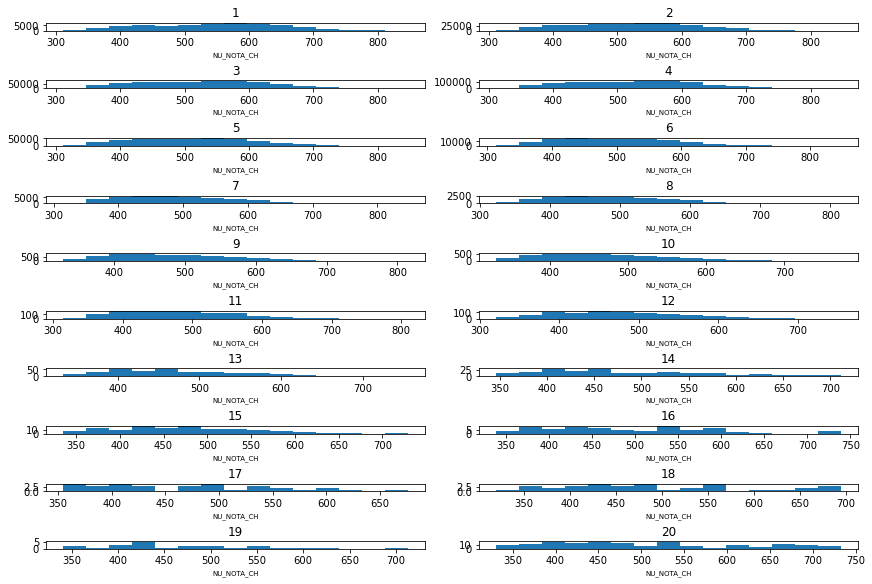




Avaliação da variação da Nota CH pela Renda Mensal


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,121871.00,587745.00,371433.00,295361.00,151975.00,176572.00,154305.00,123711.00,78459.00,48752.00,38555.00,33839.00,49745.00,31159.00,34137.00,34145.00,41982.00
count_%,5.13,24.76,15.65,12.44,6.40,7.44,6.50,5.21,3.31,2.05,1.62,1.43,2.10,1.31,1.44,1.44,1.77
mean,470.68,483.61,505.63,517.72,528.60,535.90,547.36,555.97,562.84,569.55,572.24,575.44,579.18,586.09,590.56,593.96,598.48
std,78.73,81.21,85.16,86.95,88.12,88.87,89.98,90.90,91.45,90.95,91.76,91.46,91.67,91.62,91.43,92.03,92.88
min,311.60,311.60,311.60,311.60,313.40,312.00,312.00,320.10,328.90,326.70,320.60,328.90,328.90,328.90,328.90,328.90,328.90
25%,409.60,419.10,437.50,449.10,460.80,468.90,482.10,492.80,500.90,510.20,513.00,516.90,523.00,531.70,537.00,541.10,545.80
50%,459.20,475.80,505.50,521.10,534.80,543.00,556.10,565.20,572.20,579.90,581.80,585.10,589.20,595.90,600.20,604.50,608.75
75%,523.90,542.70,568.80,581.70,592.70,600.40,612.20,620.90,628.20,634.30,637.20,640.20,643.90,650.40,654.70,658.60,664.00
max,832.50,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90,846.90


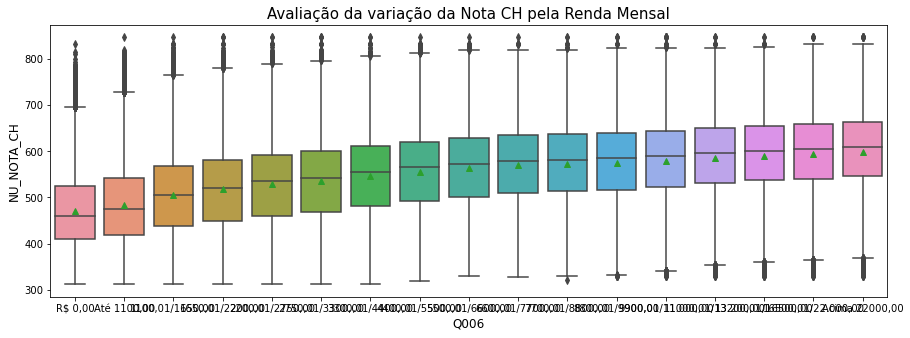

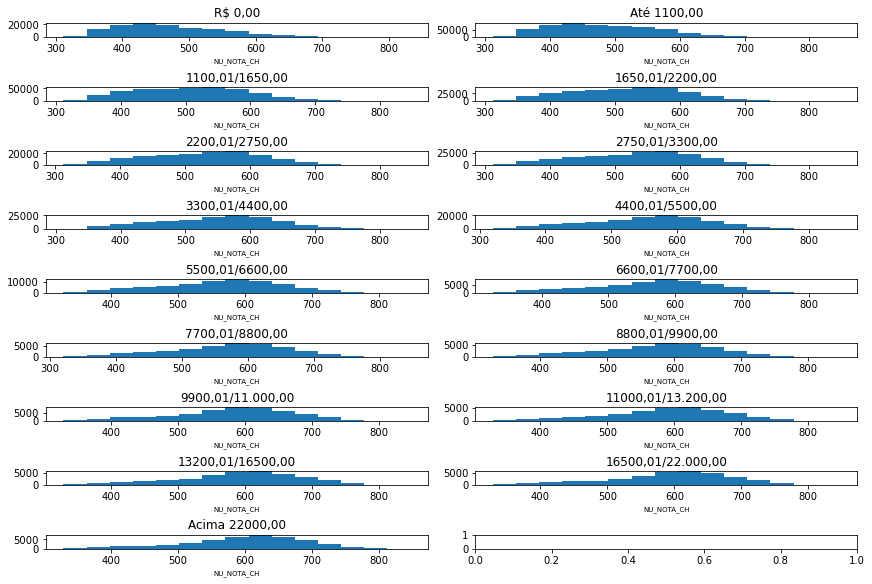




Avaliação da variação da Nota CH pela Qtd de Celulares na Residência


,0,1,2,3,4+
count,40475.00,345099.00,627526.00,753673.00,606973.00
count_%,1.71,14.54,26.44,31.75,25.57
mean,482.52,489.01,511.52,527.73,543.03
std,85.07,87.25,90.74,91.70,93.86
min,312.60,311.60,311.60,311.80,314.90
25%,414.80,419.30,438.40,455.30,471.20
50%,471.60,479.10,510.00,531.80,550.10
75%,541.90,551.00,578.00,594.70,611.00
max,816.10,846.90,846.90,846.90,846.90


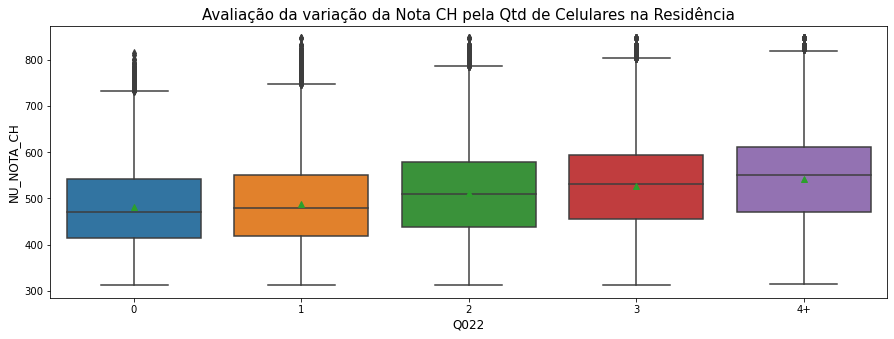

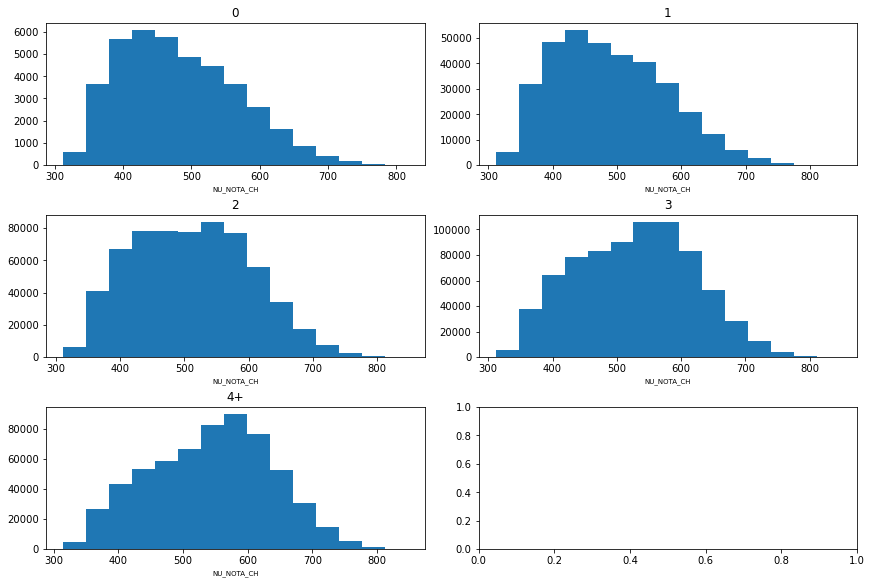




Avaliação da variação da Nota CH pela Qtd de Computadores na Residência


,0,1,2,3,4+
count,898210.00,1006119.00,291127.00,117358.00,60932.00
count_%,37.84,42.39,12.26,4.94,2.57
mean,482.71,529.80,567.41,584.07,595.28
std,79.50,89.82,91.92,91.65,91.09
min,311.60,311.60,321.80,320.10,328.90
25%,419.50,459.90,506.70,528.90,543.50
50%,475.90,535.80,577.10,594.20,605.50
75%,541.40,595.50,632.80,648.50,659.20
max,846.90,846.90,846.90,846.90,846.90


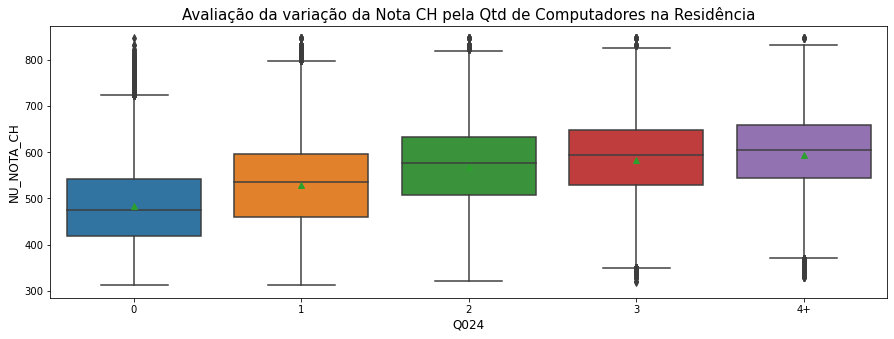

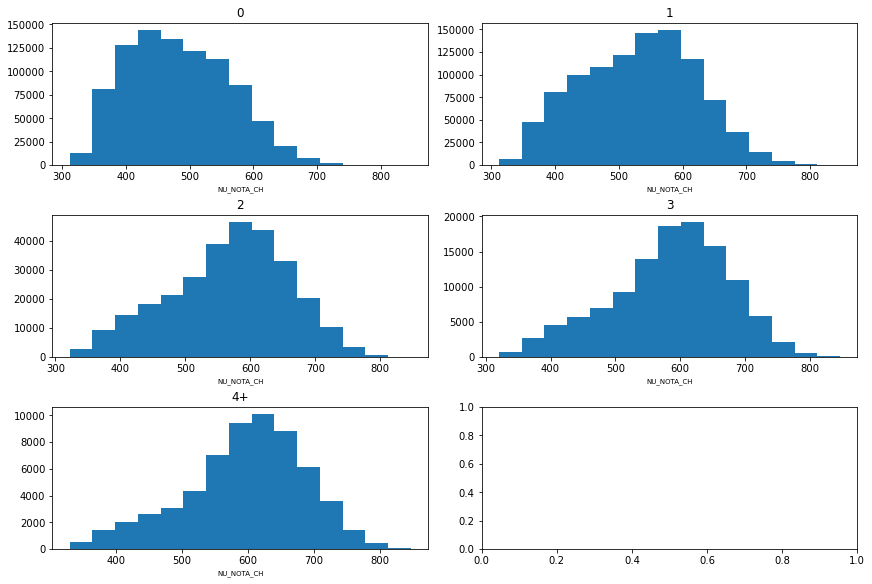




Avaliação da variação da Nota CH por Acesso a Internet na Residência


,NAO,SIM
count,204751.00,2168995.00
count_%,8.63,91.37
mean,472.77,525.51
std,78.20,93.09
min,311.60,311.60
25%,411.10,451.00
50%,463.00,528.40
75%,528.00,593.80
max,846.90,846.90


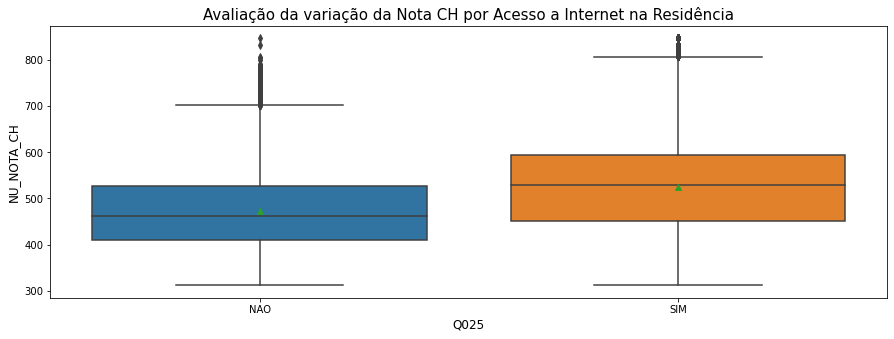

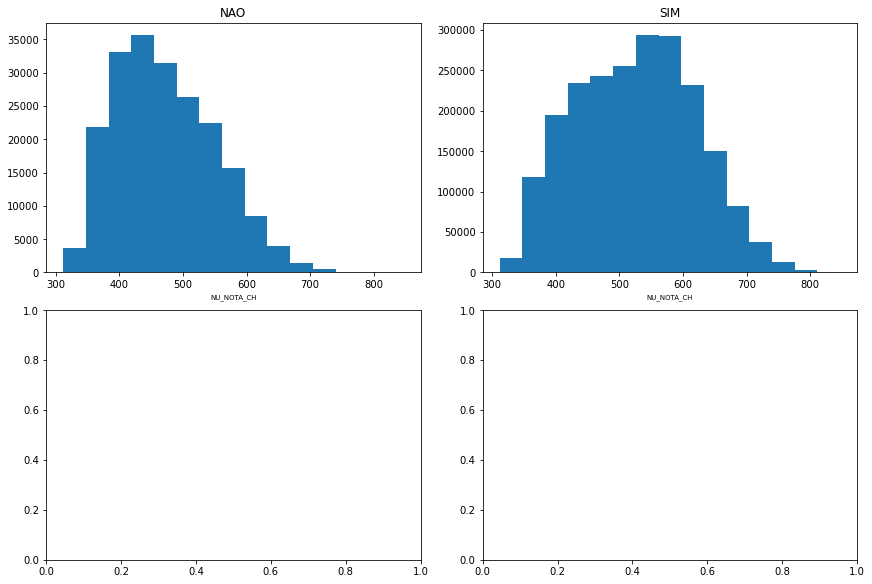

In [9]:
titulo = f'Avaliação da variação da Nota {nota} por Faixa Etária.'
coluna_1 = 'TP_FAIXA_ETARIA'                  # Clases
vrl_k = ['<17', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
         '56-60', '61-65', '66-70', '>70']
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = False
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por sexo'
coluna_1 = 'TP_SEXO'                  # Clases
Dicionario_Labels = {'SEXO_FEMININO':'F', 'SEXO_MASCULINO':'M'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Raça'
coluna_1 = 'TP_COR_RACA'                  # Clases
Dicionario_Labels = {'Nao declarado':0, 'Branca':1, 'Preta':2, 'Parda':3, 'Amarela':4, 'Indigena':5, 'Nao dispoe da informacao':6}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Ano de Conclusão Ensino Médio.'
coluna_1 = 'TP_ANO_CONCLUIU'                  # Clases
vrl_k = ['Nao informado', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
         '2009', '2008', '2007', 'Antes 2007']
vrl_v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Escola Pública/Privada.'
coluna_1 = 'TP_ESCOLA'                  # Clases
Dicionario_Labels = {'Nao Respondeu':1, 'Publica':2, 'Privada':3}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por região da aplicação da prova.'
coluna_1 = 'SG_UF_PROVA'                  # Clases
Dicionario_Labels = {}
UF = sorted(base['SG_UF_PROVA'].unique())
for i in UF:
    Dicionario_Labels[i] = i
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Homem.'
coluna_1 = 'Q001'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Mulher.'
coluna_1 = 'Q002'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Qtd de Residentes.'
coluna_1 = 'Q005'                  # Clases
vrl_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal'
coluna_1 = 'Q006'                  # Clases
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Celulares na Residência'
coluna_1 = 'Q022'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Computadores na Residência'
coluna_1 = 'Q024'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Acesso a Internet na Residência'
coluna_1 = 'Q025'                  # Clases
Dicionario_Labels = {'NAO': 'A', 'SIM': 'B'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()